In [1]:
using POMDPs
using LaserTag
using ParticleFilters
using POMDPToolbox
using QMDP
using DiscreteValueIteration
using Interact
value = Interact.value

value (generic function with 2 methods)

In [5]:
p = gen_lasertag(rng=MersenneTwister(4), reading_std=2.5, discrete=true)
up = SIRParticleFilter(p, 100000)
# policy = solve(QMDPSolver(), p)
policy = solve(BestExpectedSolver(ValueIterationSolver()), p)
hr = HistoryRecorder(max_steps=100, rng=MersenneTwister(3))
hist = simulate(hr, p, policy, up)
ns = n_steps(hist)-1

22

Interact.Options{:SelectionSlider,Int64}(9: "input-3" = 11 Int64 ,"i",11,"11",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(18=>"18",2=>"2",16=>"16",11=>"11",21=>"21",7=>"7",9=>"9",10=>"10",19=>"19",17=>"17"…)),Any[],Any[],true,"horizontal")

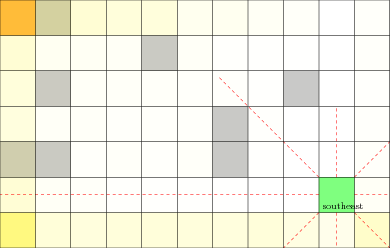

In [6]:
@manipulate for i in 1:ns
    s = state_hist(hist)[i+1]
    o = observation_hist(hist)[i]
    a = action_hist(hist)[i+1]
    b = belief_hist(hist)[i+1]
    LaserTagVis(p, s=s, a=a, o=o, b=b)
end

In [4]:
i=0

0

In [7]:
i+=1
s = state_hist(hist)[i+1]
o = observation_hist(hist)[i]
a = action_hist(hist)[i+1]
b = belief_hist(hist)[i+1]
r = reward_hist(hist)[i+1]
LaserTagVis(p, s=s, a=a, o=o, b=b, r=r)

LoadError: BoundsError: attempt to access 50-element Array{Int64,1} at index [51]

In [6]:
using Reel
frames = Frames(MIME("image/png"), fps=2)
for i in 1:ns
    s = state_hist(hist)[i+1]
    o = observation_hist(hist)[i]
    a = action_hist(hist)[i+1]
    b = belief_hist(hist)[i+1]
    r = reward_hist(hist)[i+1]
    push!(frames, LaserTagVis(p, s=s, a=a, o=o, b=b, r=r))
    print(".")
end

write("/tmp/lasertag.gif", frames)

.................................................

"/tmp/lasertag.gif"